In [1]:
# Install required packages (run once in Colab)
!pip install opencv-python scikit-image matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from google.colab import files


--2026-02-19 03:58:12--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.09s   

2026-02-19 03:58:13 (5.26 MB/s) - ‘lena.png’ saved [473831/473831]

Image shape: (512, 512)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

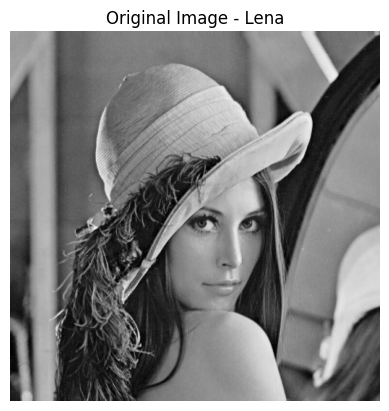

In [5]:
# Download standard Lena image
!wget -O lena.png https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

print("Image shape:", img.shape)   # sanity check

plt.imshow(img, cmap='gray')
plt.title("Original Image - Lena")
plt.axis('off')



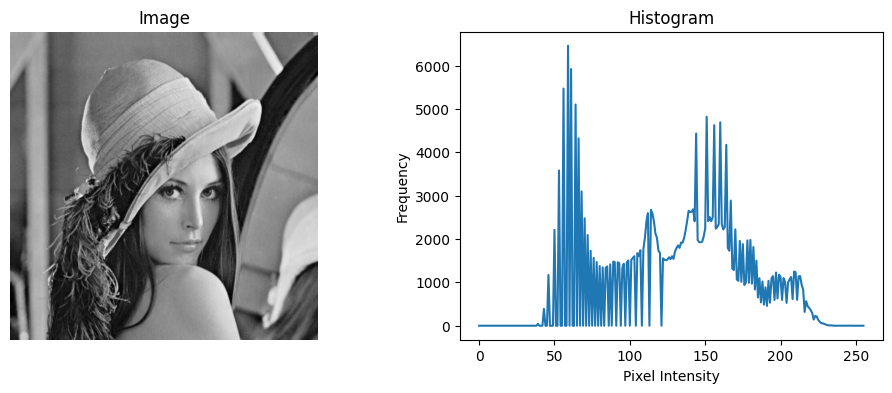

In [6]:
# Histogram
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(hist)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()


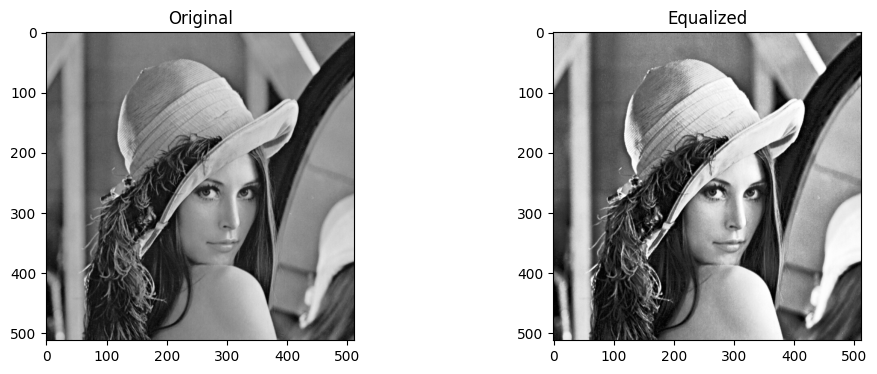

In [7]:
# Histogram Equalisation

equalized = cv2.equalizeHist(img)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized")

plt.show()


Saving mountain.jpg to mountain.jpg


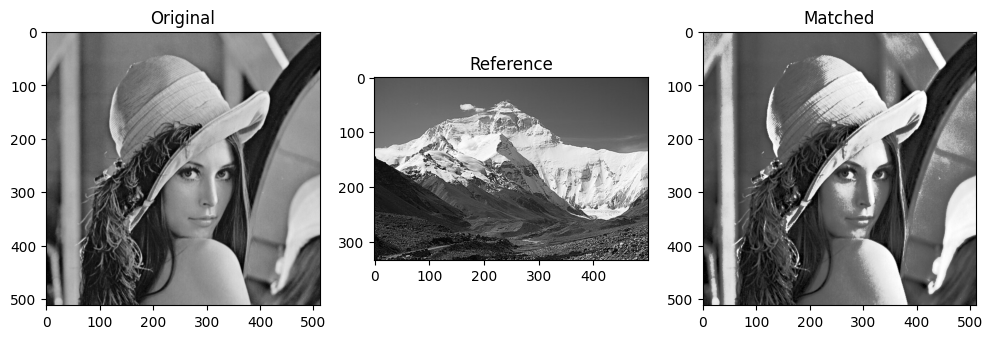

In [13]:
# Upload reference image
uploaded2 = files.upload()

ref = cv2.imread(list(uploaded2.keys())[0])
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Histogram Matching
matched = exposure.match_histograms(img, ref)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(ref, cmap='gray')
plt.title("Reference")

plt.subplot(1,3,3)
plt.imshow(matched, cmap='gray')
plt.title("Matched")

plt.show()


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

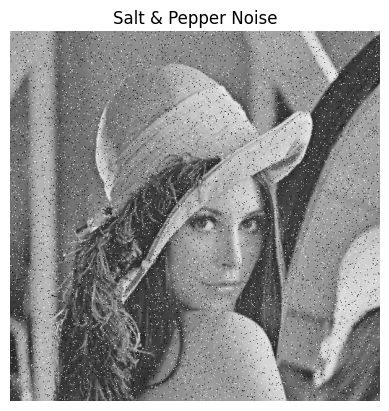

In [10]:
def salt_pepper_noise(image, prob=0.02):
    noisy = np.copy(image)
    h, w = noisy.shape

    # Salt
    num_salt = int(prob * h * w / 2)
    coords = [np.random.randint(0, i-1, num_salt) for i in noisy.shape]
    noisy[coords[0], coords[1]] = 255

    # Pepper
    num_pepper = int(prob * h * w / 2)
    coords = [np.random.randint(0, i-1, num_pepper) for i in noisy.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

noisy_img = salt_pepper_noise(img, 0.05)

plt.imshow(noisy_img, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')


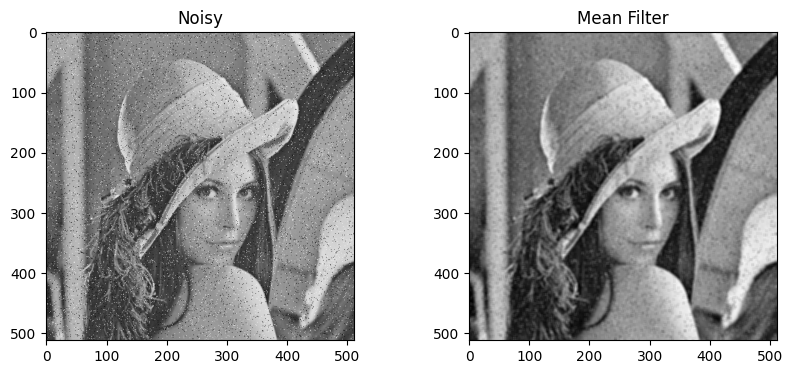

In [11]:
mean_filtered = cv2.blur(noisy_img, (5,5))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")

plt.show()


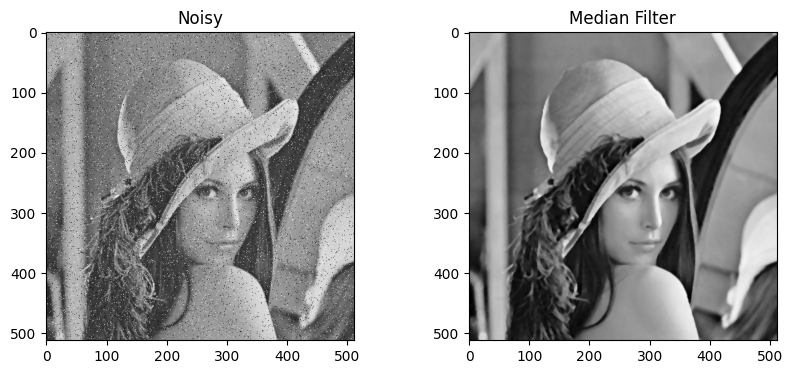

In [12]:
median_filtered = cv2.medianBlur(noisy_img, 5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")

plt.show()
